<a href="https://colab.research.google.com/github/mirco-heidemann/NGFS/blob/main/NGFS_EnTryDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEMO
---

*Launch Version (1.0)*

---

For feedback, please participate in our user survey [here](https://www.surveymonkey.de/r/C68V37M).

---
This script provides exemplary code to access, query, visualise and export the preview data of the 4th vintage of the NGFS Scenarios, with possibilities to compare its results to vintage 3. This code works identically in any python IDE when downloaded. Nonetheless, the advantage of this browser-based interface (Google Colab) is that no installation is required, which may be problematic within some institutional infrastructures.


This demo script gives an overview of the basic functions of the pyam package developed by IIASA and made available for the use of the NGFS scenarios. The demo script performs the following steps:

A. Connect to data

B. Define the desired models, scenarios and variables, access and store them in a data frame.

C. Plot the desired data

D. Export the used dataframe to .csv or .xlsx for further local use

---

This notebook is *view only*. To **run this Colab notebook**, either:

- [By default] **Run in playground mode:**  Otherwise try File > Open in playground mode (Changes will not be saved, however data and visualisations can be downloaded)
- **Make a copy to your Google Drive so you can make local changes:** File > Save a copy in Drive, or open a new notebook File > New Notebook to copy the code and create your own script (not possible if Google Drive is blocked by firewalls or security)
- **Download the script as Jupyter notebook, so you can run it on your computer configured with Jupyter:** File > Download .ipynb (not possible if Google Drive is blocked by firewalls or security)

---
---

*The code is based on an open-source Python package pyam-iamc. For guidance and documentation on the pyam-iamc package refer to information provided [here](https://pyam-iamc.readthedocs.io/en/stable/index.html).*

*For support on undocumented problems in Pyam please raise the issue in the [GitHub Forum](https://github.com/IAMconsortium/pyam/issues) or join the [Slack Community](https://pyam-iamc.slack.com/join/shared_invite/zt-1xapbpjw3-hfVe7dJ16U1DtxibB65H1Q#/shared-invite/email)* and raise the issue in the #helpdesk.

*For support on the use of Google Colab, please refer to the [FAQ](https://research.google.com/colaboratory/faq.html).*

*For questions and comments on the NGFS EnTry scripts and their application, please reach out to Clemens Lehofer (clemens-maria.lehofer@ecb.europa.eu) or Mario Morelli (mario.morelli@ecb.europa.eu).*

---
---

***When using this script, ensure to run all cells in order as they appear.***

# A. Connect Data

**Install and import packages**

In [ ]:
!pip install ixmp4 # package for IIASA Explorer log-in and authentification
!pip install pyam-iamc # package to access NGFS scenario data
import pyam
import ixmp4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

<IPython.core.display.Javascript object>

**Connect to data.**

To access the phase 4 preview, you have to log in with your IIASA Scenario Explore account that is activated for the unpublished phase 4 data. If only  public data is accessed, you do not need to log in.

Log in with your IIASA Scenario Explorer account details below. Replace 'username' with your account username or email. Then run the cell and enter your password when requested. Choose yes ('y') when asked to store credentials in this runtime.

In [ ]:
!ixmp4 login username # this log-in will only be necessary for preview, i.e. unpublished scenario data

# B. Data Querying and inspection

### Choose parameters

The full names of all possible parameters can be found in the documentation of the respective phases in the IIASA portal. Follow the links to each phase. [Phase 3](https://data.ene.iiasa.ac.at/ngfs/#/docs), [Phase 4](https://data.ece.iiasa.ac.at/ngfs-phase-4-preview/#/docs).

**To check what variables or regions are available in which phase or model and navigate the data dimensions, refer to this [parameter guide](https://colab.research.google.com/drive/1me73vvS2rQCFeQ3q1Ohck3JMltG0hEGS?usp=sharing).**

---

In this demo we are analysing data from both phase 3 and 4. Hence we will query both phases. Parameters are queried by quoting their full name, as stored in the IIASA portal.

In [ ]:
# Choose the parameters of interest Phase 4
model = ['MESSAGEix-GLOBIOM 1.1-M-R12', 'REMIND-MAgPIE 3.2-4.6', 'GCAM 6.0 NGFS']
variable = ["Emissions|CO2*", 'Primary Energy', 'Primary Energy|Coal', 'Secondary Energy*','Final Energy','Population', 'Price|Carbon', 'Investment|Energy Supply*']
region = ['Asia (R5)', 'Latin America (R5)', 'Middle East & Africa (R5)', 'OECD & EU (R5)', 'Reforming Economies (R5)', 'World', 'MESSAGEix-GLOBIOM 1.1-R12|China', 'MESSAGEix-GLOBIOM 1.1-R12|Western Europe', 'MESSAGEix-GLOBIOM 1.1-R12|North America']
scenario = ['Below 2°C', 'Current Policies', 'Delayed transition', 'Divergent Net Zero', 'Nationally Determined Contributions (NDCs)', 'Net Zero 2050', 'Low demand']

# Choose the additonal variables of interest specific to Phase 3 (if they are named differently compared to Phase 4)
model.extend(['REMIND-MAgPIE 3.0-4.4', 'GCAM 5.3+ NGFS'])
variable.extend([])
region.extend([])
scenario.extend([])

***'Nested' models such as 'Downscaling[REMIND-MAgPIE 3.2-4.6]' or 'NiGEM NGFS v1.23.2[GCAM 6.0 NGFS]' may require an addition to their original name to be queried effectively. Add a backslash \ before the square brackets of the nested model.***

***E.g. 'Downscaling\[REMIND-MAgPIE 3.2-4.6\]' or 'NiGEM NGFS v1.23.2\[GCAM 6.0 NGFS\]'***

### Query and data inspection

**Run the query with the parameters set above.** The code will return an overview table of the unique parameters in the resulting dataframe for both phase 3 and 4. This is to check that the query worked and did not omit any variables that were chosen due to conflicting parameters etc.

The API access provided through pyam.read_iiasa() will always query the latest available update of the scenario data. An overview of data versions can be found under the Download tab in the IIASA scenario Explorer.


In [ ]:
from tabulate import tabulate #package to display unique values queried per parameter

# List of phase names
pyam.iiasa.Connection().valid_connections #check valid connections

phase_names = ['ngfs_phase_3', 'ngfs_phase_4'] #choose the scenario data / phases of interest

# Create an empty list to store data frames
data_frames = []

# Iterate over the phase names and query the data
for phase in phase_names:
    df = pyam.read_iiasa(
        name=phase,
        model=model,
        variable=variable,
        region=region,
        scenario=scenario
    )
    data_frames.append(df) # as we are looking on two phases that can only be queried seperately we append the two resulting data frames to each other

    # We inspect the resulting data, by summarising the values per parameter in two table, one per phase.
    summary = {}
    summary['Models'] = df.model
    summary['Variables'] = df.variable
    summary['Regions'] = df.region
    summary['Scenarios'] = df.scenario

    table = list(summary.items())
    print(tabulate(table, headers=['Column', f'Parameters - {phase}'], tablefmt='fancy_grid'))

# It is also possible to store the two phases in separate data frames to simplify further analysis
df_p3 = data_frames[0]
df_p4 = data_frames[1] if 'ngfs_phase_4' in phase_names else None

ixmp4.conf.settings - INFO: Connecting as user 'clehofer'.
pyam.iiasa - INFO: You are connected as user `clehofer`
pyam.iiasa - INFO: You are connected to the IXSE_NGFS_PHASE_3 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ngfs-phase-3/#/about
pyam.iiasa - INFO: You are connected as user `clehofer`


╒═══════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

pyam.iiasa - INFO: You are connected to the IXSE_NGFS_PHASE_4 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/ngfs/#/about
pyam.iiasa - INFO: You are connected as user `clehofer`


╒═══════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════

**Inspect the resulting data frame further** (in this case the data frame for phase 4). If we want to get a better understanding of the data itself, we use the following code to return an overview of the head and bottom of the resulting data frame in a time series format, using ".timeseries()"

In [ ]:
# Display variables as time series
df_p4.filter(year = range(2005, 2101)).timeseries()

2020  \
model                 scenario      region    variable                                      unit                      
GCAM 6.0 NGFS         Below 2?C     Asia (R5) Emissions|CO2                                 Mt CO2/yr  18511.475404   
                                              Emissions|CO2|AFOLU                           Mt CO2/yr    449.115907   
                                              Emissions|CO2|Energy                          Mt CO2/yr  16888.829456   
                                              Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  18062.359497   
                                              Emissions|CO2|Energy|Demand                   Mt CO2/yr   9080.571679   
...                                                                                                             ...   
REMIND-MAgPIE 3.2-4.6 Net Zero 2050 World     Secondary Energy|Liquids|Gas|w/o CCS          EJ/yr          0.096656   
                                              Secondary Energy|Liquids|Oil                  EJ/yr        171.235008   
                                              Secondary Energy|Solids                       EJ/yr         95.116679   
                                              Secondary Energy|Solids|Biomass               EJ/yr         37.141108   
                                              Secondary Energy|Solids|Coal                  EJ/yr         57.975571   

                                                                                                               2025  \
model                 scenario      region    variable                                      unit                      
GCAM 6.0 NGFS         Below 2?C     Asia (R5) Emissions|CO2                                 Mt CO2/yr  18928.029738   
                                              Emissions|CO2|AFOLU                           Mt CO2/yr    344.065529   
                                              Emissions|CO2|Energy                          Mt CO2/yr  17421.688592   
                                              Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  18583.964206   
                                              Emissions|CO2|Energy|Demand                   Mt CO2/yr   9608.607208   
...                                                                                                             ...   
REMIND-MAgPIE 3.2-4.6 Net Zero 2050 World     Secondary Energy|Liquids|Gas|w/o CCS          EJ/yr          0.092898   
                                              Secondary Energy|Liquids|Oil                  EJ/yr        174.736874   
                                              Secondary Energy|Solids                       EJ/yr         86.703733   
                                              Secondary Energy|Solids|Biomass               EJ/yr         33.821674   
                                              Secondary Energy|Solids|Coal                  EJ/yr         52.882058   

                                                                                                               2030  \
model                 scenario      region    variable                                      unit                      
GCAM 6.0 NGFS         Below 2?C     Asia (R5) Emissions|CO2                                 Mt CO2/yr  16463.611574   
                                              Emissions|CO2|AFOLU                           Mt CO2/yr    240.313297   
                                              Emissions|CO2|Energy                          Mt CO2/yr  15289.240010   
                                              Emissions|CO2|Energy and Industrial Processes Mt CO2/yr  16223.298270   
                                              Emissions|CO2|Energy|Demand                   Mt CO2/yr   8696.876829   
...                                                                                                             ...   
REMIND-MAgPIE 3.2-4.6 Net Zero 2050 World     Secondary Energy|

**Any queried data frame can always be further filter by any parameter through the .filter() function.**

In [ ]:
df_p4.filter(variable=['Emissions|CO2|AFOLU', 'Emissions|CO2|Energy'], model = 'GCAM 6.0 NGFS').timeseries()

2020  \
model         scenario      region                    variable             unit                      
GCAM 6.0 NGFS Below 2?C     Asia (R5)                 Emissions|CO2|AFOLU  Mt CO2/yr    449.115907   
                                                      Emissions|CO2|Energy Mt CO2/yr  16888.829456   
                            Latin America (R5)        Emissions|CO2|AFOLU  Mt CO2/yr    775.550000   
                                                      Emissions|CO2|Energy Mt CO2/yr   1589.397452   
                            Middle East & Africa (R5) Emissions|CO2|AFOLU  Mt CO2/yr   1249.200000   
...                                                                                            ...   
              Net Zero 2050 OECD & EU (R5)            Emissions|CO2|Energy Mt CO2/yr   8933.506782   
                            Reforming Economies (R5)  Emissions|CO2|AFOLU  Mt CO2/yr   -688.060000   
                                                      Emissions|CO2|Energy Mt CO2/yr   2502.452767   
                            World                     Emissions|CO2|AFOLU  Mt CO2/yr   1347.945899   
                                                      Emissions|CO2|Energy Mt CO2/yr  32948.074160   

                                                                                              2025  \
model         scenario      region                    variable             unit                      
GCAM 6.0 NGFS Below 2?C     Asia (R5)                 Emissions|CO2|AFOLU  Mt CO2/yr    344.065529   
                                                      Emissions|CO2|Energy Mt CO2/yr  17421.688592   
                            Latin America (R5)        Emissions|CO2|AFOLU  Mt CO2/yr    554.633333   
                                                      Emissions|CO2|Energy Mt CO2/yr   1649.048095   
                            Middle East & Africa (R5) Emissions|CO2|AFOLU  Mt CO2/yr    978.513333   
...                                                                                            ...   
              Net Zero 2050 OECD & EU (R5)            Emissions|CO2|Energy Mt CO2/yr   8002.840508   
                            Reforming Economies (R5)  Emissions|CO2|AFOLU  Mt CO2/yr   -590.883333   
                                                      Emissions|CO2|Energy Mt CO2/yr   2194.033639   
                            World                     Emissions|CO2|AFOLU  Mt CO2/yr    792.747815   
                                                      Emissions|CO2|Energy Mt CO2/yr  32031.109560   

                                                                                              2030  \
model         scenario      region                    variable             unit                      
GCAM 6.0 NGFS Below 2?C     Asia (R5)                 Emissions|CO2|AFOLU  Mt CO2/yr    240.313297   
                                                      Emissions|CO2|Energy Mt CO2/yr  15289.240010   
                            Latin America (R5)        Emissions|CO2|AFOLU  Mt CO2/yr    333.716667   
                                                      Emissions|CO2|Energy Mt CO2/yr   1459.927897   
                            Middle East & Africa (R5) Emissions|CO2|AFOLU  Mt CO2/yr    707.826667   
...                                                                                            ...   
              Net Zero 2050 OECD & EU (R5)            Emissions|CO2|Energy Mt CO2/yr   5342.163281   
                            Reforming Economies (R5)  Emissions|CO2|AFOLU  Mt CO2/yr   -493.706667   
                                                      Emissions|CO2|Energy Mt CO2/yr   1486.920767   
                            World                     Emissions|CO2|AFOLU  Mt CO2/yr    238.730334   
                                                      Emissions|CO2|Energy Mt CO2/yr  23599.593090   

                                                                                              2035  \
model      

### Convert to Pandas data frame

**It is possible to transform IAMC data frames as they come natively in pyam to pandas data frames.** This is done by applying the function .as_pandas()

In [ ]:
df_pandas = df_p4.as_pandas()
df_pandas.head()

,model,scenario,region,variable,unit,year,value,version
0,GCAM 6.0 NGFS,Below 2?C,Asia (R5),Emissions|CO2,Mt CO2/yr,2020,18511.475404,NaN
1,GCAM 6.0 NGFS,Below 2?C,Asia (R5),Emissions|CO2,Mt CO2/yr,2025,18928.029738,NaN
2,GCAM 6.0 NGFS,Below 2?C,Asia (R5),Emissions|CO2,Mt CO2/yr,2030,16463.611574,NaN
3,GCAM 6.0 NGFS,Below 2?C,Asia (R5),Emissions|CO2,Mt CO2/yr,2035,13953.054160,NaN
4,GCAM 6.0 NGFS,Below 2?C,Asia (R5),Emissions|CO2,Mt CO2/yr,2040,11436.756711,NaN


Find all other possible default methods with diagnostic features in the pyam package [here](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html).

# C. Visualisation

*For all visualisations, always make sure that you have successfully queried the needed models, scenarios, variables, regions. The following code snippets are templates that can be fully adapted to the needs of the user.*

### Set the NGFS theme

To introduce the NGFS visual identity to the visualisations, we import the font and color coding used in NGFS communication so far.

In [ ]:
# IMPORT THE NGFS FONT STYLE
from matplotlib import font_manager as fm, pyplot as plt
!wget https://github.com/fontfen/myriad-pro/raw/master/MyriadPro-Regular.ttf
!wget https://github.com/fontfen/myriad-pro/raw/master/MyriadPro-It.ttf
!wget https://github.com/fontfen/myriad-pro/raw/master/MyriadPro-Bold.ttf

font_files = fm.findSystemFonts('.')

for font_file in font_files:
    fm.fontManager.addfont(font_file)

plt.rc('font', family='Myriad Pro')


# SET THE GENERAL NGFS COLOR PALETTE -  with 'cmap=ngfs_cmap' it can be used in any .plot function using matplotlib later on
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def create_custom_colormap(colors, name='custom_colormap'):
    n_bins = 20  # Number of bins in the colormap
    cmap = LinearSegmentedColormap.from_list(name, colors, N=n_bins)
    return cmap

ngfs_colors = ['#BFC80F','#6F7374', '#F37022', '#B00069', '#016BAB', '#009BA3']
ngfs_cmap = create_custom_colormap(ngfs_colors)


# ASSIGN SPECIFIC COLORS TO SPECIFIC PARAMETERS - these settings are superior to any general color palette i.e. the cmap defined above. It can be easily expanded with other definitions.
color_map = {
'ngfs_phase_2':'#6F7374',
'ngfs_phase_3':'#BFC80F',
'ngfs_phase_4': '#009BA3',
'GCAM 6.0 NGFS': '#009BA3',
'GCAM': '#009BA3',
'REMIND': '#6F7374',
'REMIND-MAgPIE 3.2-4.6': '#6F7374',
'REMIND-MAgPIE 3.1-4.6': '#6F7374',
'MESSAGEix-GLOBIOM 1.1-M-R12': '#BFC80F',
'MESSAGE': '#BFC80F',
'GCAM 5.3+ NGFS': '#81C9CD',
'REMIND-MAgPIE 3.0-4.4': '#B9B9B9',
'MESSAGEix-GLOBIOM 1.1-M-R12': '#BFC80F',
'NiGEM NGFS v1.22 [GCAM 5.3+ NGFS]': '#81C9CD',
'NiGEM NGFS v1.22 [REMIND-MAgPIE 3.0-4.4]': '#B9B9B9',
'NiGEM NGFS v1.22 [MESSAGEix-GLOBIOM 1.1-M-R12]': '#EDF466',
'NiGEM NGFS v1.23.1[GCAM 6.0 NGFS]': '#009BA3',
'NiGEM NGFS v1.23.1[REMIND-MAgPIE 3.2-4.6]': '#6F7374',
'NiGEM NGFS v1.23.1 [MESSAGEix-GLOBIOM 1.1-M-R12]': '#BFC80F',
'NiGEM NGFS v1.23.2[GCAM 6.0 NGFS]': '#009BA3',
'NiGEM NGFS v1.23.2[REMIND-MAgPIE 3.2-4.6]': '#6F7374',
'NiGEM NGFS v1.23.2[MESSAGEix-GLOBIOM 1.1-M-R12]': '#BFC80F',
'NiGEM NGFS v1.23.2\[GCAM 6.0 NGFS\]': '#009BA3',
'NiGEM NGFS v1.23.2\[REMIND-MAgPIE 3.2-4.6\]': '#6F7374',
'NiGEM NGFS v1.23.2\[MESSAGEix-GLOBIOM 1.1-M-R12\]': '#BFC80F',
'NiGEM NGFS v1.23.2\\[MESSAGEix-GLOBIOM 1.1-M-R12\\]': '#BFC80F',
'Fragmented World': '#E20081',
'd_delfrag': '#009BA3',
'd_strain': '#E20081',
'h_cpol': '#6F7374',
'h_ndc': '#F37022',
'o_1p5c': '#BFC80F',
'o_2c': '#016BAB',
'Current Policies': '#6F7374',
'Delayed transition': '#009BA3',
'Divergent Net Zero': '#B00069',
'Nationally Determined Contributions (NDCs)': '#F37022',
'Nationally Determined Contributions (NDCs) ': '#F37022',
'Current Policies ': '#6F7374',
'NDCs': '#F37022',
'Net Zero 2050': '#BFC80F',
'Below 2?C': '#016BAB',
'Below 2°C': '#016BAB',
'o_lowdem':'#E88ECC',
'Low Demand':'#E88ECC',
'NiGEM NGFS v1.22|United States': '#009BA3',
'NiGEM NGFS v1.22|Developing Europe': '#6F7374',
'NiGEM NGFS v1.22|Asia': '#BFC80F',
'NiGEM NGFS v1.22|Latin America': '#B00069',
'NiGEM NGFS v1.22|Europe': '#F37022',
'Latin America (R5)': '#B00069',
'Asia (R5)': '#BFC80F',
'Middle East & Africa (R5)': '#FF75C7',
'OECD & EU (R5)': '#F37022',
'Reforming Economies (R5)': '#6F7374',
'Latin America': '#B00069',
'Asia': '#BFC80F',
'Middle East & Africa (R5)': '#FF75C7',
'Europe': '#F37022',
'Developing Europe': '#6F7374',
'World': '#016BAB',
'NiGEM NGFS v1.22|World': '#016BAB',
'Emissions|CO2|AFOLU': '#B00069',
'Emissions|CO2|Energy|Demand|Industry': '#F37022',
'Emissions|CO2|Energy|Demand|Residential and Commercial': '#BFC80F',
'Emissions|CO2|Energy|Demand|Transportation': '#016BAB',
'Emissions|CO2|Energy|Supply': '#009BA3',
'NiGEM|Gross Domestic Product (GDP)|Acute physical': '#6F7374',
'NiGEM|Gross Domestic Product (GDP)|Chronic physical': '#009BA3',
'NiGEM|Gross Domestic Product (GDP)|Combined': '#016BAB',
'NiGEM|Gross Domestic Product (GDP)|Transition': '#BFC80F',
'NiGEM|Gross Domestic Product (GDP)|Acute physical': '#6F7374',
'Gross Domestic Product (GDP)(chronic)': '#009BA3',
'Gross Domestic Product (GDP)(combined)': '#016BAB',
'Gross Domestic Product (GDP)(transition)': '#BFC80F',
'Average': '#F37022',
'Max': '#BFC80F',
'Min': '#009BA3'
}

# MANUALLY ADD THE MISSING MINUS SIGN NOT AVAILABLE IN THE FONT - The following replaces the missing sign with a hyphen
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

pyam.run_control().update({'color': {'model': color_map}})
pyam.run_control().update({'color': {'scenario': color_map}})
pyam.run_control().update({'color': {'region': color_map}})
pyam.run_control().update({'color': {'variable': color_map}})

--2023-11-07 08:00:31--  https://github.com/fontfen/myriad-pro/raw/master/MyriadPro-Regular.ttf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fontfen/myriad-pro/master/MyriadPro-Regular.ttf [following]
--2023-11-07 08:00:31--  https://raw.githubusercontent.com/fontfen/myriad-pro/master/MyriadPro-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31872 (31K) [application/octet-stream]
Saving to: ‘MyriadPro-Regular.ttf’

MyriadPro-Regular.t 100%[===================>]  31.12K  --.-KB/s    in 0.01s   

2023-11-07 08:00:31 (2.57 MB/s) - ‘MyriadPro-Regular.ttf’ saved [31872/31872]

--2023-1

### Simplify parameter names for visualisation

To simplify the plotting in the subsequent code, names are easily harmonised by renaming them.

In [ ]:
rename_scenarios = { # dictionary to translate scenario names
    'd_delfrag': 'Delayed transition',
    'd_strain': 'Fragmented World',
    'h_cpol': 'Current Policies',
    'h_ndc': 'NDCs',
    'Nationally Determined Contributions (NDCs)' : 'NDCs',
    'o_1p5c': 'Net Zero 2050',
    'o_lowdem': 'Low Demand',
    'o_2c': 'Below 2°C',
    'Below 2?C': 'Below 2°C'
    }

rename_models = { # dictionary to translate model names
    'GCAM 5.3+ NGFS': 'GCAM',
    'GCAM 6.0 NGFS':'GCAM',
    'MESSAGEix-GLOBIOM 1.1-M-R12': 'MESSAGE',
    'REMIND-MAgPIE 3.0-4.4': 'REMIND',
    'REMIND-MAgPIE 3.2-4.6': 'REMIND'
    }

df_p4 = df_p4.rename(scenario=rename_scenarios)
df_p3 = df_p3.rename(scenario=rename_scenarios)
df_p4 = df_p4.rename(model=rename_models)
df_p3 = df_p3.rename(model=rename_models)

### Standard plots

**Line charts** - returns a simple line chart for the parameters chosen in the .filter function

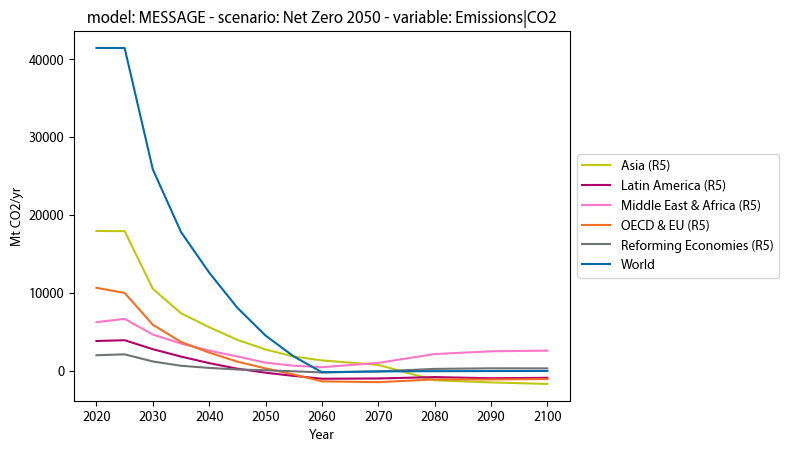

In [ ]:
import matplotlib.pyplot as plt

ax = df_p4.filter(
    variable='Emissions|CO2',
    model='MESSAGE',
    scenario = ['Net Zero 2050'],
    region = ['Asia (R5)', 'Latin America (R5)',  'Middle East & Africa (R5)', 'OECD & EU (R5)', 'Reforming Economies (R5)', 'World']
    ).plot(
    color='region',
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
)

**Scatter plots** - returns a simple scatterplot for the parameters chosen in the .filter function and the chosen x and y variables in the .plot function

<Axes: xlabel='Primary Energy|Coal', ylabel='Emissions|CO2'>

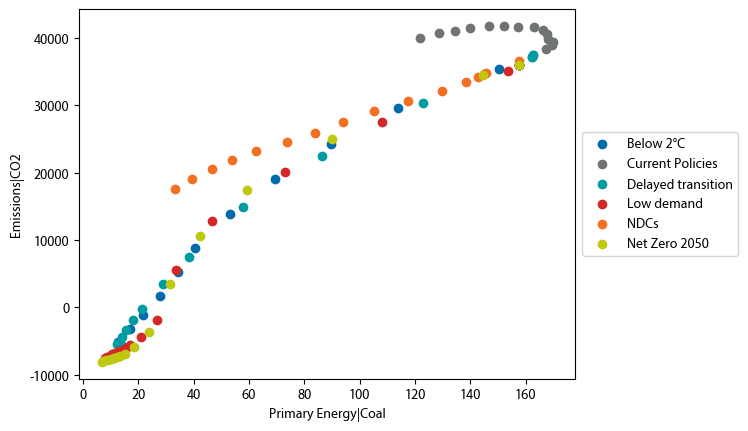

In [ ]:
df = df_p4.filter(model='GCAM',
                  region="World")
df.plot.scatter(
    x='Primary Energy|Coal',
    y='Emissions|CO2',
    color='scenario',
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
)

**Bar plots** - returns a  bar plot for the parameters chosen in the .filter function

<Axes: title={'center': 'model: GCAM scenario: Current Policies region: World'}, xlabel='Year', ylabel='EJ/yr'>

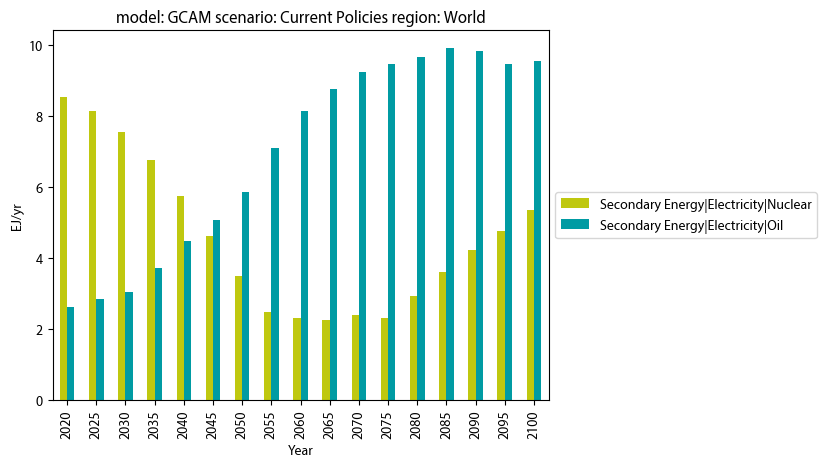

In [ ]:
df = df_p4.filter(model='GCAM',
                  region="World",
                  variable = ["Secondary Energy|Electricity|Oil", "Secondary Energy|Electricity|Nuclear"],
                  scenario = "Current Policies")
df.plot.bar(legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5)), cmap=ngfs_cmap)

### Phase 3 and 4 Comparison

The code provided below compares the absolute amount of Coal, as the primary energy source, between the Current Policies scenario of the Message Model of NGFS scenarios vintage 3 and 4. The comparison is performed for selected regions.

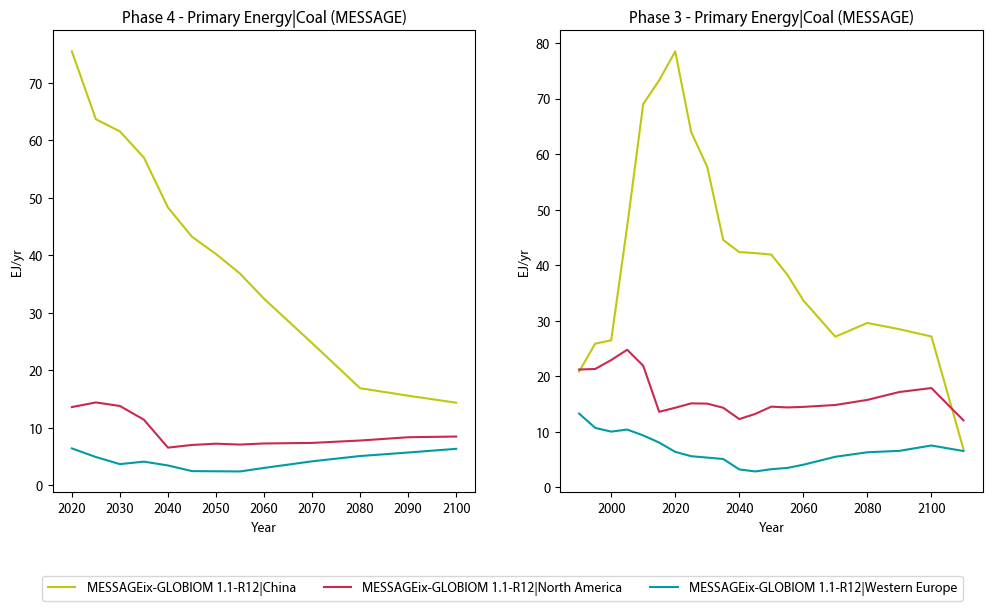

In [ ]:
import matplotlib.pyplot as plt

# Example Case 4 vs 3 - Primary Energy from Coal - breakdown regions

# Set comparison variables:
comparison_variable = 'Primary Energy|Coal'
comparison_model = 'MESSAGE'
comparison_region = ['MESSAGEix-GLOBIOM 1.1-R12|China', 'MESSAGEix-GLOBIOM 1.1-R12|Western Europe', 'MESSAGEix-GLOBIOM 1.1-R12|North America']
comparison_scenario = ['Current Policies']

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Phase 4
df_p4_filtered = df_p4.filter(variable=comparison_variable, model = comparison_model, region = comparison_region, scenario = comparison_scenario)
df_p4_filtered.plot(color='region', legend=False, ax=ax1, cmap = ngfs_cmap)
ax1.set_title(f'Phase 4 - {comparison_variable} ({df_p4_filtered.model[0]})')

# Phase 3
df_p3_filtered = df_p3.filter(variable=comparison_variable, model = comparison_model, region = comparison_region, scenario = comparison_scenario)
df_p3_filtered.plot(color='region', legend=False, ax=ax2, cmap = ngfs_cmap)
ax2.set_title(f'Phase 3 - {comparison_variable} ({df_p3_filtered.model[0]})')

# Display one common legend
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, -0.05), ncol=len(labels))

For more sophisticated plotting we can always transform the data into a pandas data frame that offers more flexibility in plotting using the matplotlib library.

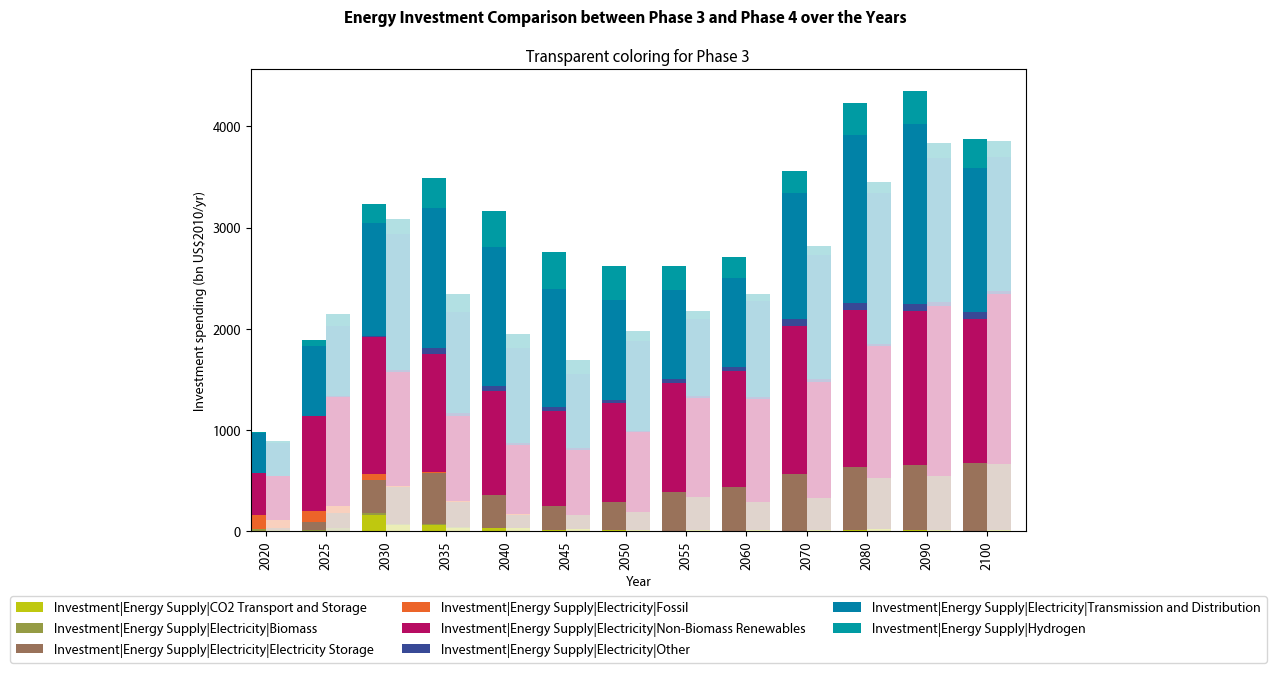

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df_Phase4 = df_p4.filter(
    model='REMIND', region = 'World', variable = ['Investment|Energy Supply|CO2 Transport and Storage', 'Investment|Energy Supply|Electricity|Biomass', 'Investment|Energy Supply|Electricity|Fossil', 'Investment|Energy Supply|Electricity|Electricity Storage','Investment|Energy Supply|Electricity|Non-Biomass Renewables','Investment|Energy Supply|Electricity|Other','Investment|Energy Supply|Electricity|Transmission and Distribution','Investment|Energy Supply|Hydrogen'],
    scenario = 'Net Zero 2050', year = range(2020, 2101)).as_pandas()

df_Phase3 = df_p3.filter(
    model='REMIND', region = 'World', variable = ['Investment|Energy Supply|CO2 Transport and Storage', 'Investment|Energy Supply|Electricity|Biomass', 'Investment|Energy Supply|Electricity|Fossil', 'Investment|Energy Supply|Electricity|Electricity Storage','Investment|Energy Supply|Electricity|Non-Biomass Renewables','Investment|Energy Supply|Electricity|Other','Investment|Energy Supply|Electricity|Transmission and Distribution','Investment|Energy Supply|Hydrogen'],
    scenario = 'Net Zero 2050', year = range(2020, 2101)).as_pandas()


import matplotlib.pyplot as plt
import pandas as pd

# Pivot the data for each phase
df_Phase4_pivot = df_Phase4.pivot(index='year', columns='variable', values='value')
df_Phase3_pivot = df_Phase3.pivot(index='year', columns='variable', values='value')

# Create the clustered stacked bar plot using Pandas
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Phase 4 data
df_Phase4_pivot.plot.bar(stacked=True, ax=ax, width=0.4, position=1, cmap=ngfs_cmap, label='Phase 4')
handles, labels = ax.get_legend_handles_labels()

# Plot Phase 3 data with reduced opacity (alpha)
df_Phase3_pivot.plot.bar(stacked=True, ax=ax, width=0.4, position=0, cmap=ngfs_cmap, alpha=0.3, label='Phase 3', legend = False)

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Investment spending (bn US$2010/yr)')
plt.suptitle('Energy Investment Comparison between Phase 3 and Phase 4 over the Years', fontweight = 'bold')
plt.title('Transparent coloring for Phase 3')
#plt.xticks(range(len(years)), years)
plt.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()


### Choosing specific points in time

**Filter the specific years of interest.** To give an indication of the resulting timeframe, the code returns a time series table and a respective scatter plot.

We look at the relationship between CO2 emissions and coal energy consumption in the year 2050 for all regions in the MESSAGE model.

In [ ]:
df = df_p4.filter(variable = ['Primary Energy|Coal', 'Emissions|CO2'], model='MESSAGE', year=[2050])
df.timeseries()

2050
model   scenario      region                          variable            unit                  
MESSAGE Below 2°C     Asia (R5)                       Emissions|CO2       Mt CO2/yr  7191.575270
                                                      Primary Energy|Coal EJ/yr        16.654798
                      Latin America (R5)              Emissions|CO2       Mt CO2/yr   978.399557
                                                      Primary Energy|Coal EJ/yr         2.941031
                      MESSAGEix-GLOBIOM 1.1-R12|China Emissions|CO2       Mt CO2/yr  3434.163832
...                                                                                          ...
        Net Zero 2050 OECD & EU (R5)                  Primary Energy|Coal EJ/yr         2.092456
                      Reforming Economies (R5)        Emissions|CO2       Mt CO2/yr    76.804192
                                                      Primary Energy|Coal EJ/yr         0.469931
                      World                           Emissions|CO2       Mt CO2/yr  4529.447964
                                                      Primary Energy|Coal EJ/yr        27.514285

[108 rows x 1 columns]

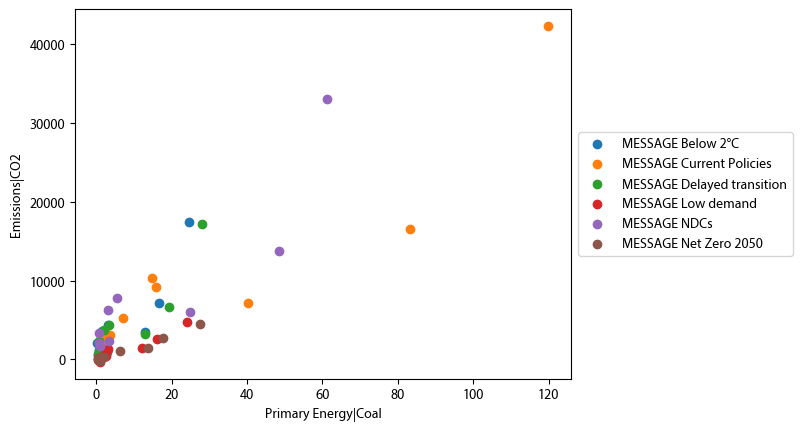

In [ ]:
import matplotlib.pyplot as plt

ax = df.plot.scatter(
    x='Primary Energy|Coal',
    y='Emissions|CO2',
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
)

### More visualisation options

**Furthermore, we can show ranges and disaggregated aggregates, i.e. the granularity of the data.**

The first plot shows the consumption of coal as primary energy per region, stacked on top of each other, for model MESSAGE and the 2 Degrees scenario.

The second plot shows the range between the different scenarios of the same variable across the three models on global level.

/usr/local/lib/python3.10/dist-packages/pyam/plotting.py:466: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  pd.concat([_df, _rows.loc[_rows.index.difference(_df.index)]])
/usr/local/lib/python3.10/dist-packages/pyam/plotting.py:485: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  _df_pos = _df.applymap(lambda x: max(x, 0))
/usr/local/lib/python3.10/dist-packages/pyam/plotting.py:486: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  _df_neg = _df.applymap(lambda x: min(x, 0))


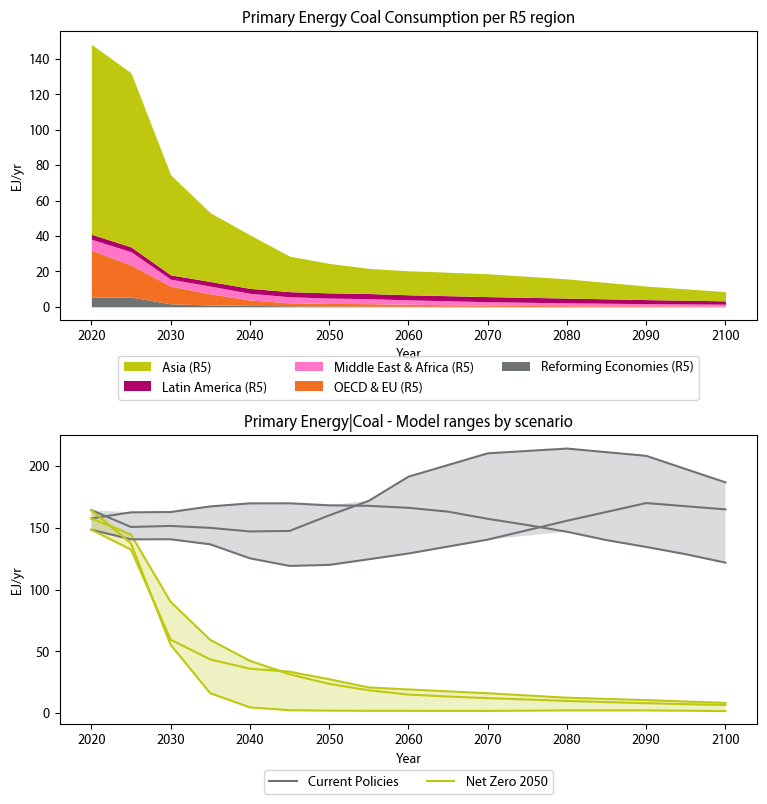

In [ ]:
import matplotlib.pyplot as plt

# Set the width of the subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 9))  # Increase the height as desired

# Plot 1 - stacking values
df_p4.filter(
    variable="Primary Energy|Coal",
    scenario='Below 2°C',
    model='MESSAGE',
    region=['Asia (R5)', 'Latin America (R5)', 'Middle East & Africa (R5)', 'OECD & EU (R5)', 'Reforming Economies (R5)']
).plot.stack(stack="region", ax=ax1, title = 'Primary Energy Coal Consumption per R5 region')

ax1.legend(loc='center', bbox_to_anchor=(0.5, -0.2), ncol=3)  # Place the legend below the first plot

# Plot 2 - visualizing ranges between model results
df_p4.filter(variable='Primary Energy|Coal', region='World', scenario = ['Current Policies', 'Net Zero 2050', 'Fragmented World']).plot(
    color="scenario",
    fill_between=True,
    marker=None,
    linestyle=None,
    final_ranges=None,
    ax=ax2,
    cmap=None,
    legend=False, title = 'Primary Energy|Coal - Model ranges by scenario')

# Create a custom legend for the second plot
handles, labels = ax2.get_legend_handles_labels()
unique_labels = list(set(labels))  # Get unique scenario names
custom_legend = ax2.legend(handles[:len(unique_labels)], unique_labels, loc='center', bbox_to_anchor=(0.5, -0.2),
                            ncol=3)  # Place the legend below the second plot

# Adjust the layout to accommodate the legends
plt.subplots_adjust(hspace=0.4)

plt.show()

**One can also plot a variable's subcategories.** In the below example, we extract the variable gorup "Emissions|CO2*" and plots its subcategories.

/usr/local/lib/python3.10/dist-packages/pyam/plotting.py:461: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  _rows = pd.concat(
/usr/local/lib/python3.10/dist-packages/pyam/plotting.py:485: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  _df_pos = _df.applymap(lambda x: max(x, 0))
/usr/local/lib/python3.10/dist-packages/pyam/plotting.py:486: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  _df_neg = _df.applymap(lambda x: min(x, 0))


<Axes: title={'center': 'Sectoral GHG emissions, Net Zero 2050 - REMIND'}, xlabel='Year', ylabel='Mt CO2/yr'>

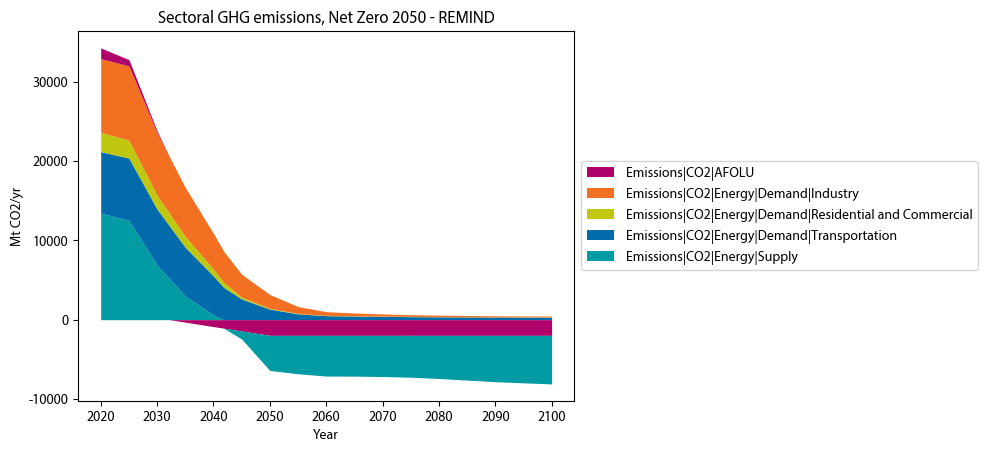

In [ ]:
df_p4.filter(
    model='GCAM', scenario='Net Zero 2050', variable="Emissions|CO2*", region="World", year = range(2020, 2101)
    ).filter(
        variable=["Emissions|CO2|AFOLU",
                   "Emissions|CO2|Energy|Demand|Industry",
                   "Emissions|CO2|Energy|Demand|Residential and Commercial",
                   "Emissions|CO2|Energy|Demand|Transportation",
                   "Emissions|CO2|Energy|Supply",
                   "Emissions|CO2|LULUCF Direct+Indirect"] , keep=True
        ).plot.stack(title = "Sectoral GHG emissions, Net Zero 2050 - REMIND", cmap=ngfs_cmap)

### Data manipulation and operations


**Create new variables calculated based on existing variables.** In the following case we calculate the primary energy use of coal per capita across different regions in the Below 2°C scenario for the MESSAGE model. To do that we divide the coal consumption by population, two variables that are both provided by the IAMs.

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1565: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


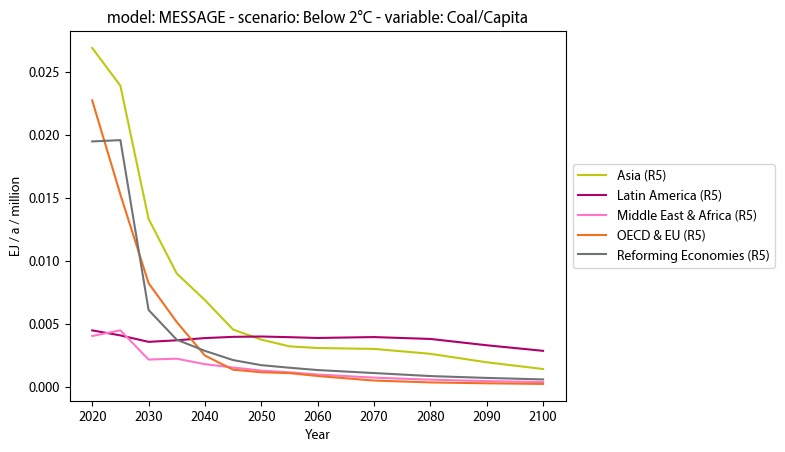

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pyam

df = df_p4.filter(variable=["Primary Energy", "Primary Energy|Coal", "Population"]) # we filter for the variables of interest

df = df.divide("Primary Energy|Coal", "Population", "Coal/Capita") # perform the operation: Coal energy divided by population. And call the new variable Coal/Capita

df = df.filter(
    variable=["Coal/Capita"],
    model='MESSAGE',
    scenario=['Below 2°C'],
    region=['Asia (R5)', 'Latin America (R5)', 'Middle East & Africa (R5)', 'OECD & EU (R5)', 'Reforming Economies (R5)']
).plot(
    color='region',
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
)

**Calculating and visualising averages**. In the following, we calculate the average carbon prices across IAMs in the Net Zero 2050 scenario.

<Axes: title={'center': 'Carbon Price across models'}, xlabel='Year', ylabel='Value'>

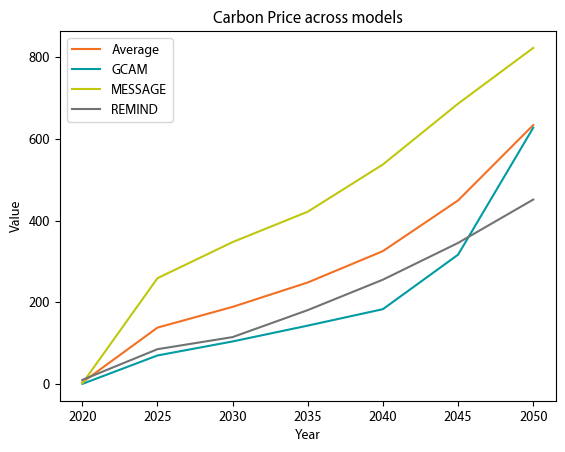

In [ ]:
# Creating a helper data frame to calculate the average

# We filter the queried data frame to the variables of interest
df_help = df_p3.filter(
    scenario = 'Net Zero 2050', region = 'World',  year = range(2020, 2051), variable = 'Price|Carbon', model = ['GCAM', 'REMIND', 'MESSAGE']
    )

# To calculate the sum of the model, we create respective data frames for each IAM and rename the data lines for each model and append the data frames again
df_REMIND = df_help.filter(model = 'REMIND').rename(variable={'Price|Carbon': 'Price|Carbon REMIND'}).rename(model={'REMIND': 'Average'})
df_MESSAGE = df_help.filter(model = 'MESSAGE').rename(variable={'Price|Carbon': 'Price|Carbon MESSAGE'}).rename(model={'MESSAGE': 'Average'})
df_GCAM = df_help.filter(model = 'GCAM').rename(variable={'Price|Carbon': 'Price|Carbon GCAM'}).rename( model={'GCAM': 'Average'})

df_new = df_REMIND.append(df_MESSAGE, ignore_meta_conflict=True)
df_new = df_new.append(df_GCAM, ignore_meta_conflict=True)

df_new.add('Price|Carbon REMIND', 'Price|Carbon MESSAGE', 'Sum', ignore_units=True, append = True)
df_new.add('Sum', 'Price|Carbon GCAM', 'Sum_final', ignore_units=True, append = True)

# Now we divide the sum by the number of IAMs, i.e. 3.
df_new.divide('Sum_final', 3, "Average", ignore_units=True, append = 'True')

# As a last step we store the average data row in a seperate data frame and append it to the original dataset
df_avg = df_new.filter(variable = 'Average')
df = df_help.append(df_avg)

# Finally, we can produce the plot to compare model carbon prices and the model average
df.plot(color='model', title = "Carbon Price across models", cmap = ngfs_cmap)

**Calculating shares of variables.**

/usr/local/lib/python3.10/dist-packages/pyam/plotting.py:466: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  pd.concat([_df, _rows.loc[_rows.index.difference(_df.index)]])
/usr/local/lib/python3.10/dist-packages/pyam/plotting.py:485: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  _df_pos = _df.applymap(lambda x: max(x, 0))
/usr/local/lib/python3.10/dist-packages/pyam/plotting.py:486: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  _df_neg = _df.applymap(lambda x: min(x, 0))


<Axes: title={'center': 'Share of Electricity in Total Secondary Energy'}, xlabel='Year', ylabel='%/100'>

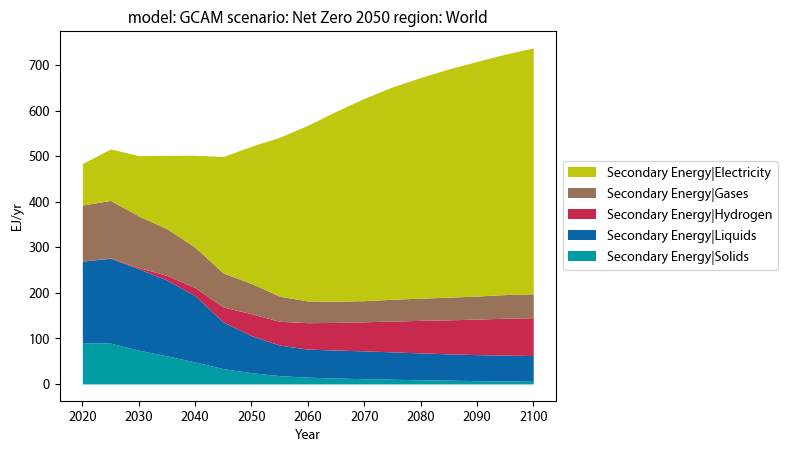

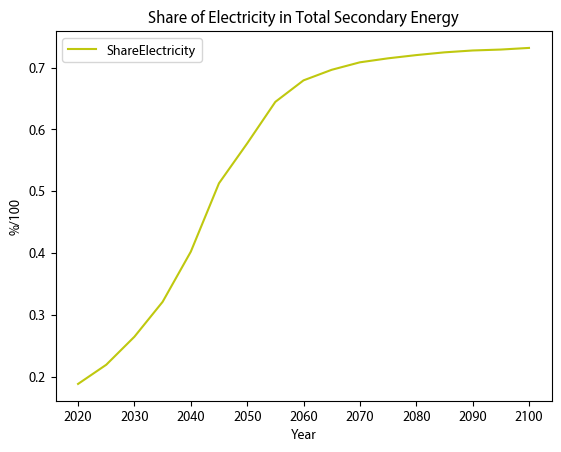

In [ ]:
df = df_p4.filter(variable=['Secondary Energy','Secondary Energy*'], model = ['GCAM'], region = ['World'], scenario = ['Net Zero 2050'], level=1)
df.filter(variable=['Secondary Energy'], keep = False).plot.stack(cmap = ngfs_cmap)

df_ShareElectricity = df.divide('Secondary Energy|Electricity', 'Secondary Energy', 'ShareElectricity', ignore_units="%/100")
df_ShareElectricity.plot(color = 'variable', cmap = ngfs_cmap, title = 'Share of Electricity in Total Secondary Energy')

### Maps

In phase 4, users can use explot the downscaling to country-level and their ISO-code naming to plot heatmaps. In the following, we show the regional distribution of coal use per capita.

pyam.iiasa - INFO: You are connected to the IXSE_NGFS_PHASE_4 scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ene.iiasa.ac.at/ngfs/#/about
pyam.iiasa - INFO: You are connected as user `clehofer`
<ipython-input-23-891cc09e2f5c>:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


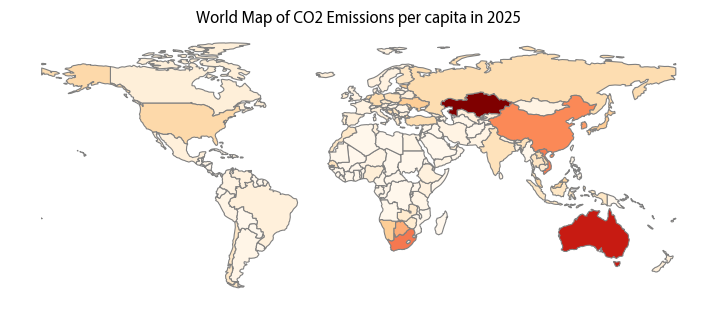

In [ ]:
df = pyam.read_iiasa(
    name='ngfs_phase_4',
    model='Downscaling\[MESSAGEix-GLOBIOM 1.1-M-R12\]',
    variable=['Primary Energy|Coal', 'Population'],
    scenario = 'Nationally Determined Contributions (NDCs)',
    )
df.divide('Primary Energy|Coal', 'Population', 'CO2 Emissions per capita', ignore_units="EJ/yr per capita", append=True)

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Choose a specific year to plot
selected_year = 2025
df_map = df.filter(year=selected_year, variable = 'CO2 Emissions per capita').as_pandas()

# Load the world map shapefile using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the aggregated DataFrame based on ISO codes (region column)
merged = world.set_index('iso_a3').join(df_map.pivot(index='region', columns='year', values='value'))

# Plot the world map
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
merged.plot(column=selected_year, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.5', legend=False)

# Customize the plot
ax.set_title(f'World Map of CO2 Emissions per capita in {selected_year}')
ax.set_axis_off()

# Show the plot
plt.show()

### Matrices

To have a comprehensive overview of the data and its differences across models and scenarios, one can easily plot matrices that facilitate such a comparison.

/usr/local/lib/python3.10/dist-packages/pyam/plotting.py:485: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  _df_pos = _df.applymap(lambda x: max(x, 0))
/usr/local/lib/python3.10/dist-packages/pyam/plotting.py:486: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  _df_neg = _df.applymap(lambda x: min(x, 0))
/usr/local/lib/python3.10/dist-packages/pyam/plotting.py:466: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  pd.concat([_df, _rows.loc[_rows.index.difference(_df.index)]])
/usr/local/lib/python3.10/dist-packages/pyam/plotting.py:485: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  _df_pos = _df.applymap(lambda x: max(x, 0))
/usr/local/lib/python3.10/dist-packages

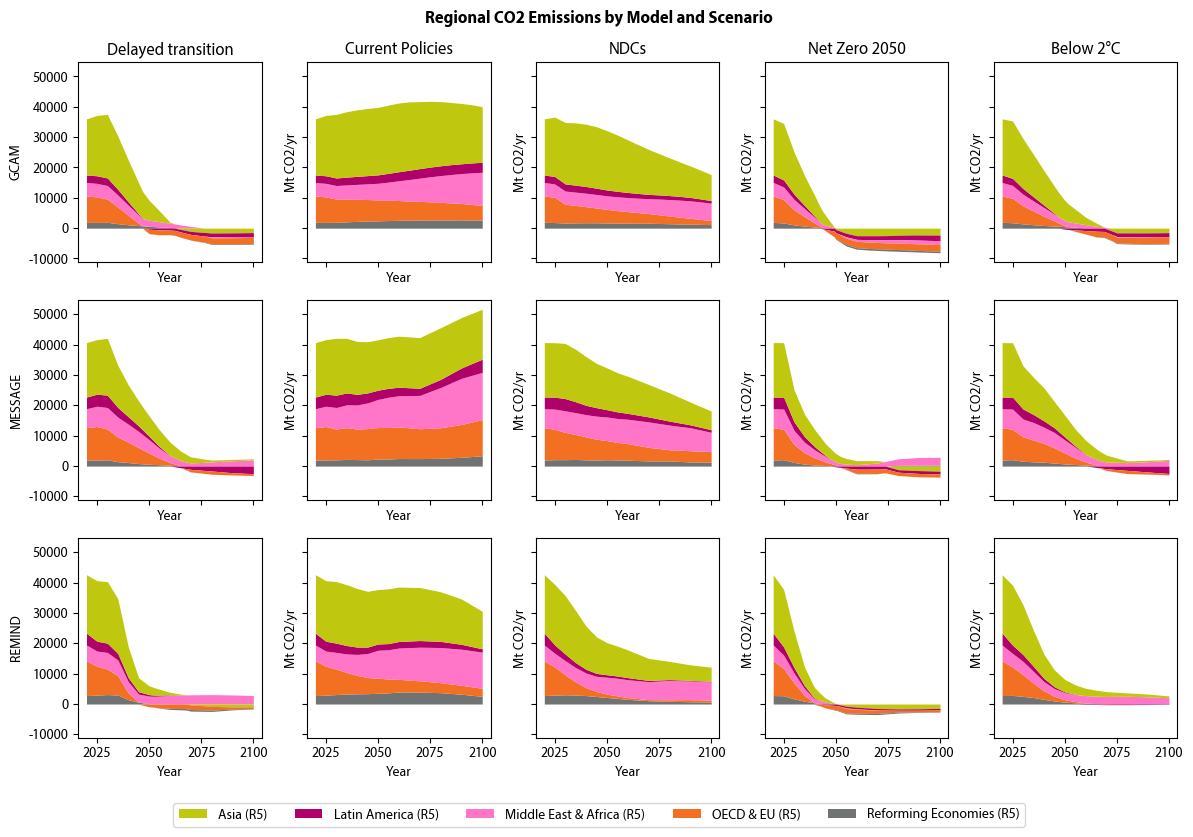

In [ ]:
import matplotlib.pyplot as plt

# Set the variable to be compared and the region of interest
comparison_variable = ['Emissions|CO2']
region = ['Latin America (R5)', 'Asia (R5)', 'Middle East & Africa (R5)', 'OECD & EU (R5)', 'Other (R5)', 'Reforming Economies (R5)']

# The following constructs the scenario x model matrix
models = ['GCAM', 'MESSAGE', 'REMIND']
scenarios = ['Delayed transition', 'Current Policies', 'NDCs', 'Net Zero 2050','Below 2°C']

# Filter the data frame for specific variable, models, scenarios, and region
df_filtered = df_p4.filter(variable=comparison_variable, model=models, scenario=scenarios, region=region)

# Set the number of rows and columns for the subplots
num_rows = len(models)
num_cols = len(scenarios)

# Create the subplots with the desired matrix layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8), sharex=True, sharey=True)

# Iterate over models and scenarios to plot the data and label the axes
for i, model in enumerate(models):
    for j, scenario in enumerate(scenarios):
        # Filter the data for the current model and scenario
        filtered_data = df_filtered.filter(model=model, scenario=scenario)

        # Plot the data on the corresponding subplot
        filtered_data.plot.stack(stack='region', ax=axes[i, j], legend = False)

        # Labelling
        axes[i, j].set_title("")
        if i == 0:
            axes[i, j].set_title(scenario)
        if j == 0:
            axes[i, j].set_ylabel(model)

# Set the overall title for the matrix of subplots
fig.suptitle("Regional CO2 Emissions by Model and Scenario", fontweight = 'bold')

# Create a common legend
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.05))

plt.tight_layout()
plt.show()

### Download figures

As shown below, plots are easily downloaded. Alternatively, one can also copy and paste the plot by right-clicking the picture and selecting 'copy'.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

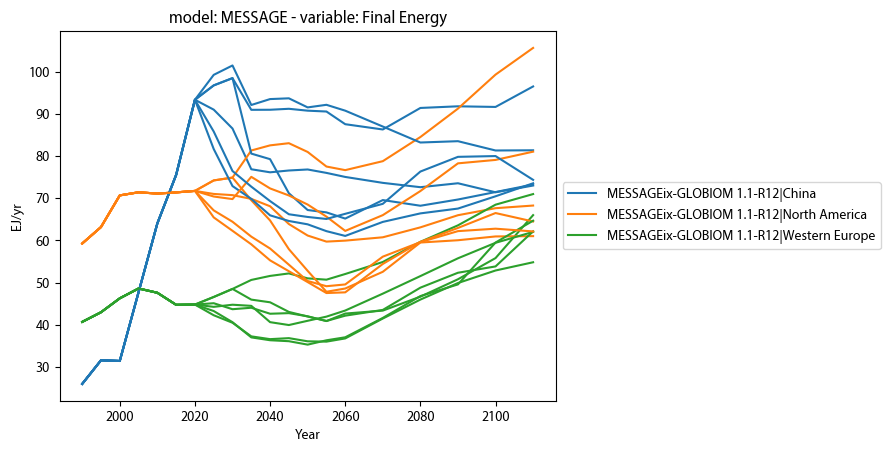

In [ ]:
# Plot
ax = df_p3.filter(variable='Final Energy', region = ['MESSAGEix-GLOBIOM 1.1-R12|China', 'MESSAGEix-GLOBIOM 1.1-R12|Western Europe', 'MESSAGEix-GLOBIOM 1.1-R12|North America']).plot(
    color='region',
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
)

# Store the plot in a file. Choose the file type by adjusting the type suffix, e.g. .png or .pdf)
plt.savefig("Plot.png", dpi=300, bbox_inches='tight')

# Download the file
from google.colab import files
files.download("Plot.png")

Find all methods with plotting features in the package [here](https://pyam-iamc.readthedocs.io/en/stable/api/plotting.html)

# D. Data Export

The following sections provides functions to export data locally, either to avoid repetitive run times or to continue analysis elsewhere.

For more information on data export function in the pyam package please visit the link [here](https://pyam-iamc.readthedocs.io/en/stable/api/io.html).

### Export dataframe as .xlsx

In Google Colab, data frames can be stored in Google Drive. The exported data frame will appear on the left pane under the files tab (if not, make sure to refresh). From there, it can be downloaded to your local system.

In [ ]:
filename = 'data_export.xlsx'
df_p3.to_excel(filename, sheet_name='data', iamc_index=False, include_meta=True)

Alternatively, we can directly download the data frame from your browser to your local system.

In [ ]:
from google.colab import files
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Export dataframe as .csv

Analogously to the excel export, we can likewise download data as a csv file.

In [ ]:
from google.colab import files

# Save the DataFrame as a CSV file
df_p4.to_csv('df_p4.csv')

# Download the CSV file in Google Colab
files.download('df_p4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---

# References:
1.   [Pyam Documentation](https://pyam-iamc.readthedocs.io/en/stable/index.html)



---

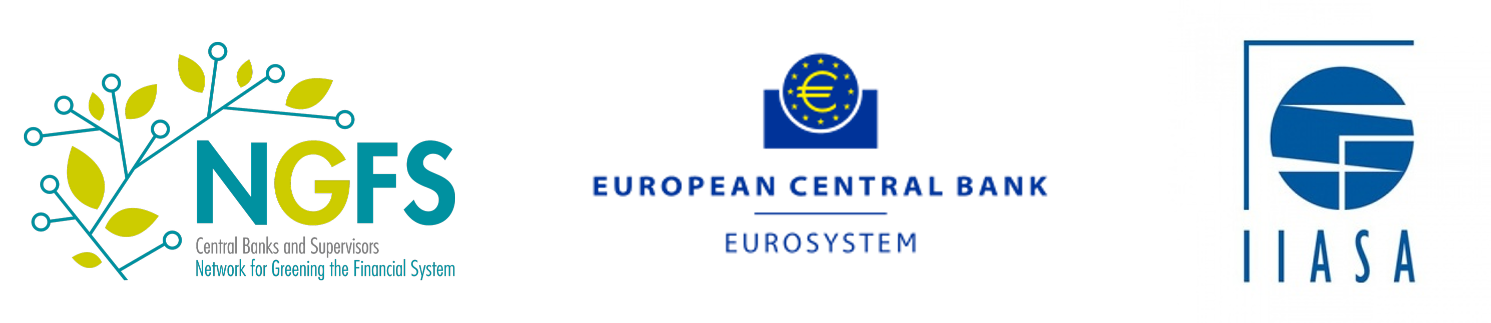